# Transformação de Dados

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [6]:
# parametros de configuração
np.set_printoptions(threshold=None, precision=2) 
# o precision refere-se a numero de casas decimais
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

In [7]:
titanic_train = pd.read_csv('/data/workspace_files/train.csv')
titanic_test = pd.read_csv('/data/workspace_files/test.csv')

In [8]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


In [9]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [10]:
titanic_test.shape

(418, 11)

In [11]:
titanic_train.shape

(891, 12)

In [12]:
titanic_train.dtypes

In [13]:
print(titanic_train.describe())

       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


In [14]:
# verificando apenas os atributos numericos (aqui descartamos os categoricos)
categ = titanic_train.dtypes[titanic_train.dtypes == "object"].index
categ

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
print("\n", titanic_train[categ].describe(), sep='\n')



                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


# Remoção de atributos irrelevantes

In [16]:
del titanic_train["PassengerId"]
del titanic_train["Ticket"]
titanic_train.shape

(891, 10)

In [18]:
# substituindo nome da coluna
new_survived = pd.Categorical(titanic_train["Survived"], ordered=True)
new_survived = new_survived.rename_categories(["Morreu", "Sobreviveu"])
titanic_train["Suvived"] = new_survived

In [19]:
new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered=True)
new_Pclass = new_Pclass.rename_categories(["1aClasse", "2aClasse", "3aClasse"])
titanic_train["Pclass"] = new_Pclass

In [20]:
print("Tipos de dados: ", titanic_train.dtypes)

Tipos de dados:  Survived       int64
Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
Suvived     category
dtype: object


In [22]:
categ = titanic_train.dtypes[titanic_train.dtypes== "category"].index
print(titanic_train[categ].describe())

          Pclass Suvived
count        891     891
unique         3       2
top     3aClasse  Morreu
freq         491     549


In [23]:
# converter atributo atraves de processamento de string
# exibe valores unicos
print('Valores unicos: ', titanic_train["Cabin"].unique())

Valores unicos:  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [28]:
# convertendo o dados para string
char_cabin = titanic_train["Cabin"].astype(str)

In [29]:
# pega apenas a primeira letra
new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train["Cabin"] = new_cabin
print('Valores unicos do atributo Cabin: ', titanic_train["Cabin"].unique())

Valores unicos do atributo Cabin:  ['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
Categories (9, object): ['A', 'B', 'C', 'D', ..., 'F', 'G', 'T', 'n']


In [30]:
# codigo refatorado
titanic_train.Cabin.unique()

['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
Categories (9, object): ['A', 'B', 'C', 'D', ..., 'F', 'G', 'T', 'n']

In [34]:
titanic_train.Age.unique()

In [39]:
titanic_train.Name.unique()

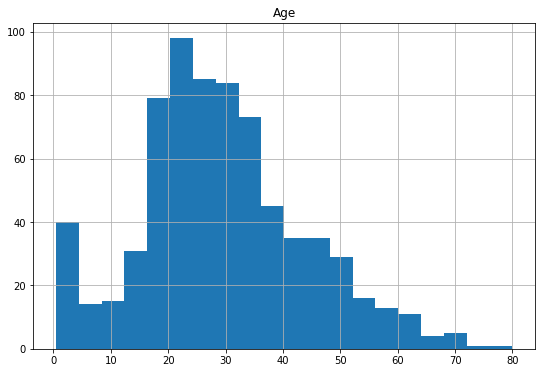

In [41]:
titanic_train.hist(column="Age", figsize=(9,6), bins=20)

In [45]:
mediana = np.median([el for el in titanic_train.Age if (np.isnan(el) == False)])
new_age = np.where(titanic_train.Age.isnull(), mediana, titanic_train.Age)
titanic_train.Age = new_age

In [52]:
print('Análise do novo atributo Age:\n',titanic_train.Age.describe())

Análise do novo atributo Age:
 count    891.00
mean      29.36
std       13.02
min        0.42
25%       22.00
50%       28.00
75%       35.00
max       80.00
Name: Age, dtype: float64


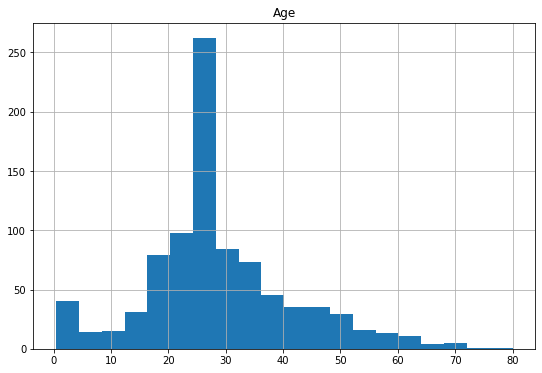

In [53]:
titanic_train.hist(column="Age", figsize=(9,6), bins=20)

Registros vom valores extremos:       Survived    Pclass                                Name     Sex   Age  \
258         1  1aClasse                    Ward, Miss. Anna  female  35.0   
679         1  1aClasse  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737         1  1aClasse              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Fare Cabin Embarked     Suvived  
258      0      0  512.33     n        C  Sobreviveu  
679      0      1  512.33     B        C  Sobreviveu  
737      0      0  512.33     B        C  Sobreviveu  


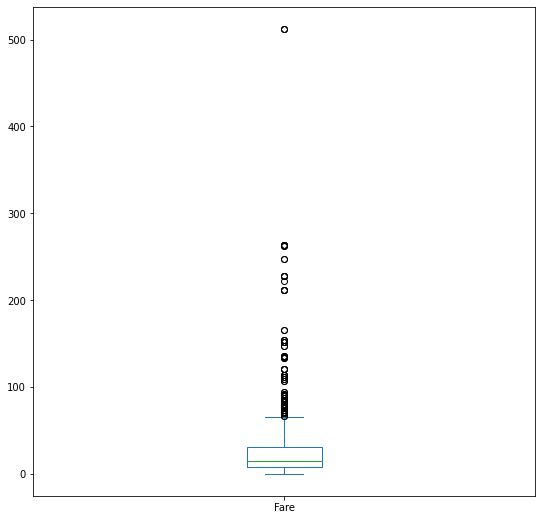

In [55]:
# detectando outliers
titanic_train.Fare.plot(kind="box", figsize=(9,9))
index = np.where(titanic_train.Fare == max(titanic_train.Fare))
print("Registros vom valores extremos: ", titanic_train.loc[index])

In [56]:
# criando novos atributos
titanic_train.Family = titanic_train.SibSp + titanic_train.Parch

# encontrando quem tem maior familia a bordo
most_family = np.where(titanic_train.Family == max(titanic_train.Family))
print("Maiores familias a bordo: ", titanic_train.loc[most_family])

Maiores familias a bordo:       Survived    Pclass                               Name     Sex   Age  \
159         0  3aClasse         Sage, Master. Thomas Henry    male  28.0   
180         0  3aClasse       Sage, Miss. Constance Gladys  female  28.0   
201         0  3aClasse                Sage, Mr. Frederick    male  28.0   
324         0  3aClasse           Sage, Mr. George John Jr    male  28.0   
792         0  3aClasse            Sage, Miss. Stella Anna  female  28.0   
846         0  3aClasse           Sage, Mr. Douglas Bullen    male  28.0   
863         0  3aClasse  Sage, Miss. Dorothy Edith "Dolly"  female  28.0   

     SibSp  Parch   Fare Cabin Embarked Suvived  
159      8      2  69.55     n        S  Morreu  
180      8      2  69.55     n        S  Morreu  
201      8      2  69.55     n        S  Morreu  
324      8      2  69.55     n        S  Morreu  
792      8      2  69.55     n        S  Morreu  
846      8      2  69.55     n        S  Morreu  
863      8    

<ipython-input-56-1268a16d5d96>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  titanic_train.Family = titanic_train.SibSp + titanic_train.Parch


In [61]:
# verificando correlação
int_fields = titanic_train.dtypes[titanic_train.dtypes == "int64"].index
corr = np.corrcoef(titanic_train[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)
print("Matriz de correlação: \n", correlacao)

Matriz de correlação: 
           Survived  SibSp  Parch
Survived      1.00  -0.04   0.08
SibSp        -0.04   1.00   0.41
Parch         0.08   0.41   1.00


# Utilizando base dados Gazola imóveis em São Paulo